In [103]:
import numpy as np
from numpy import linalg as LA
from scipy.linalg import norm
import matplotlib.pyplot as plt

function for f1

In [101]:

#function fi
fi_v = lambda x: np.sin(np.prod(x))
#lambda function for the gradient of fi
g_fi= lambda x: np.cos(np.prod(x))*np.array([np.prod(np.delete(x,idx)) for idx, val in enumerate(x)])
#grad_in = map(lambda x: np.prod(np.concatenate((x[1][:x[0]],x[1][(x[0]+1):])) 
#fi_grad = lambda x: np.cos(np.prod(x))*
    #TODO: do not evaluate Hessian if dimension does not matter anyway
h = lambda x : np.sqrt(1+x**2)

def fi(x):
    grad_fi = g_fi(x)
    #inner hessian of fi argument
    Hess_inner= np.array([[0, x[2], x[1]],
    [x[2], 0, x[0]], [x[1], x[0], 0]])
    Hess = np.cos(np.prod(x))*Hess_inner - np.sin(np.prod(x))*np.outer(grad_fi, grad_fi)
    return fi_v(x), grad_fi, Hess

def f1(x, A):
    """
    evaluates the value of the function f1
    returns value of f1 at x, gradient and Hessian
    """
    x_inner = A@x
    grad_fi=fi(x_inner)[1]
    #helper Hessian matrix of inner function of fi as defined in 1.1.3
    #Hess_inner = np.cos(np.prod(x_inner))*fi(x_inner)[2] - np.sin(np.prod(x_inner))*np.outer(grad_fi, grad_fi)
    # with expressions from 1.1.1, gradient and Hessian for f1 can be computed
    grad =  A.T@grad_fi
    Hess = A.T@fi(x_inner)[2]@A
    val = fi(x_inner)[0]
    return val, grad, Hess

def f2(x, A):
    
    x_inner= fi_v(x)
    #value @x
    val = h(x_inner)
    firstDeriv = lambda arg: arg/(h(arg))
    secondDeriv = lambda arg: 1/((1+arg**2)**(3/2))
    grad_fi = fi(x)[1]
    grad = firstDeriv(x_inner) * grad_fi
    Hess = secondDeriv(x_inner) * np.outer(grad_fi, grad_fi) + firstDeriv(x_inner)*fi(x)[2]
    return val, grad, Hess



2. function for f2

In [64]:
#TODO

Numerical Evaluation function

In [102]:
def numEval(f, x, eps, A=np.eye(len(x))):
    """
    f: argument function
    x: input vector
    eps: scalar
    A: matrix
    """
    #precompute matrices, diagonal matrix with epsilon trace
    ep_M = np.eye(len(x))*eps
    #method of central differences for gradient
    diff_g = lambda e: (f(x+e,A)[0]-f(x-e,A)[0])/(2*eps)
    grad = map(diff_g, np.transpose(ep_M))
    grad = np.fromiter(grad, dtype=np.float64)
    #compute the Hessian numerically
    #analytical lambdafunction of fi gradient
    diff_H = lambda e: (f(x+e,A)[1]-f(x-e,A)[1])/(2*eps)
    #Hess = np.zeros((len(x),len(x)))
    #map lambda function for Hessian onto the epsion diagonal matrix to create the numerical Hessian
    Hess = np.array(list(map(diff_H, ep_M)))
    #for i in range(0, len(x)):
        #Hess[i]= diff_H((np.eye(len(x))*eps)[i])
    return grad, Hess


#x = 10*np.random.random_sample((3,))
#A = 10*np.random.rand(3, 3)

x = np.array([2, 4, 5])
A = np.array([[2, 9, 4], [0, -6, 6], [-2, 1, 1]])

print("value at x = {0} is {1[0]}, \ngrad={1[1]}\nHessian = {1[2]}".format(x, f1(x, A)))


print("numerical gradient is: {0[0]} \nnumerical Hessian is: {0[1]}".format(numEval(f1, x, 2**(-40), A)))

print("gradient of f2: ", f2(x, 0)[1])
print(" num Gradient of f2: {0[0]}".format(numEval(f2, x, 2**(-40))))
print("-------------------------------")
print("Hessian of f2: ", f2(x, 0)[2])
print(" num Hessian of f2: {0[1]}".format(numEval(f2, x, 2**(-40))))


value at x = [2 4 5] is 0.13220235275593667, 
grad=[  654.20701427  1159.73061621 -2259.98786748]
Hessian = [[ -56533.28553279 -100861.49075604  196151.05835503]
 [-100861.49075604 -176666.98429786  346273.34328372]
 [ 196151.05835503  346273.34328372 -676228.63964257]]
numerical gradient is: [  654.20701599  1159.73062134 -2259.98786926] 
numerical Hessian is: [[ -57539.75   -102646.      199628.    ]
 [-102645.75   -179829.875   352437.    ]
 [ 199628.0625  352436.875  -688239.75  ]]
gradient of f2:  [-7.9697647  -3.98488235 -3.18790588]
 num Gradient of f2: [-7.96984863 -3.98486328 -3.18786621]
-------------------------------
Hessian of f2:  [[12.52847536  4.2717965   3.4174372 ]
 [ 4.2717965   3.13211884  1.7087186 ]
 [ 3.4174372   1.7087186   2.00455606]]
 num Hessian of f2: [[-86.33984375 -45.16235352 -36.13012695]
 [-45.16259766 -21.58496094 -18.06494141]
 [-36.12841797 -18.06420898 -13.81396484]]


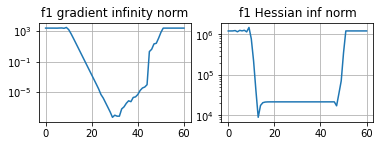

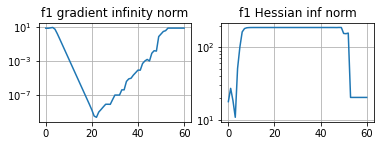

In [116]:
def compareInfnorm(func, arg1, arg2=1):
    #
    # exponent arrangement
    exp = np.arange(0, 61, dtype=float)
    grad_norm= []
    Hess_norm = []

    plt.figure()
    for eps in exp:
        grad_norm.append(norm(func(arg1, arg2)[1] - numEval(func, arg1, 2**(-eps), arg2)[0], np.inf))
        Hess_norm.append(norm(func(arg1, arg2)[2] - numEval(func, arg1, 2**(-eps), arg2)[1], np.inf))

    plt.subplot(221)
    plt.plot(exp, grad_norm)
    plt.yscale('log')
    plt.title('f1 gradient infinity norm')
    plt.grid(True)

    # log
    plt.subplot(222)
    plt.plot(exp, Hess_norm)
    plt.yscale('log')
    plt.title('f1 Hessian inf norm')
    plt.grid(True)

    return
compareInfnorm(f1, x, A)   
compareInfnorm(f2, x)  


